In [2]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('listings.csv.gz')
inputDF=inputDF[['id','instant_bookable','room_type','host_since','accommodates','bathrooms','bedrooms','beds','amenities','cancellation_policy','review_scores_rating','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]


inputDF["host_since"]= pd.to_datetime(inputDF['host_since'])
inputDF['day'] = inputDF['host_since'].dt.day
inputDF['month'] = inputDF['host_since'].dt.month
inputDF['year'] = inputDF['host_since'].dt.year
inputDF.head()

,id,instant_bookable,room_type,host_since,accommodates,bathrooms,bedrooms,beds,amenities,cancellation_policy,review_scores_rating,price,day,month,year
0,1078,t,Entire home/apt,2013-01-08,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",flexible,98.0,85.0,8,1,2013
1,2265,f,Entire home/apt,2008-08-23,4,2.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,93.0,225.0,23,8,2008
2,5245,f,Private room,2008-08-23,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,91.0,100.0,23,8,2008
3,5456,f,Entire home/apt,2009-02-16,3,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",strict_14_with_grace_period,96.0,95.0,16,2,2009
4,5769,f,Private room,2009-02-19,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",moderate,98.0,40.0,19,2,2009


In [4]:
inputDF = inputDF[inputDF.year > 2007]

Text(0,0.5,'number of hosts')

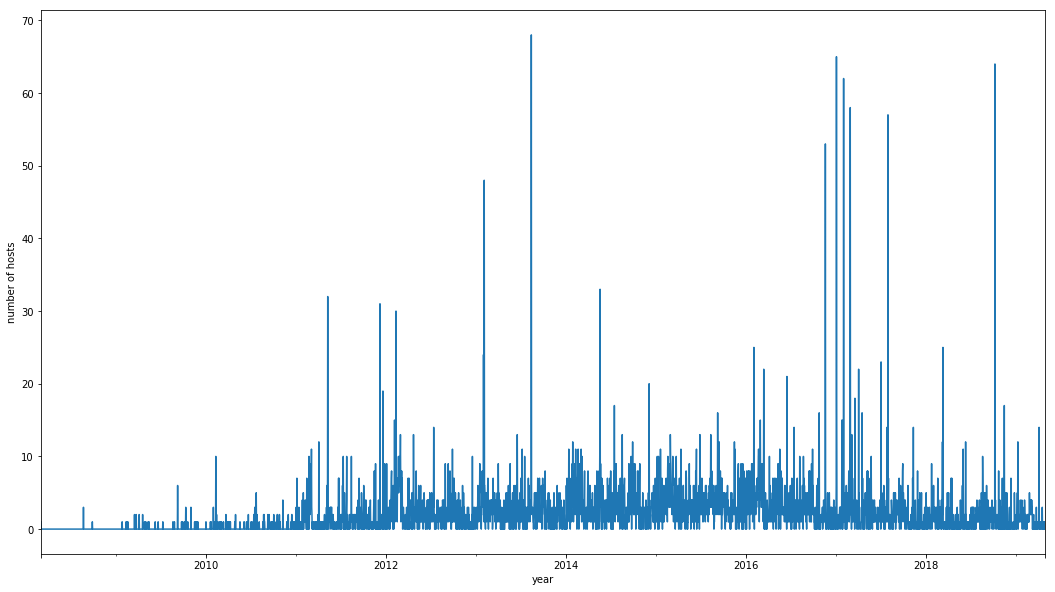

In [5]:
# this graph shows count of host registered everyday by resampling the data for each day

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

Text(0,0.5,'Number of hosts')

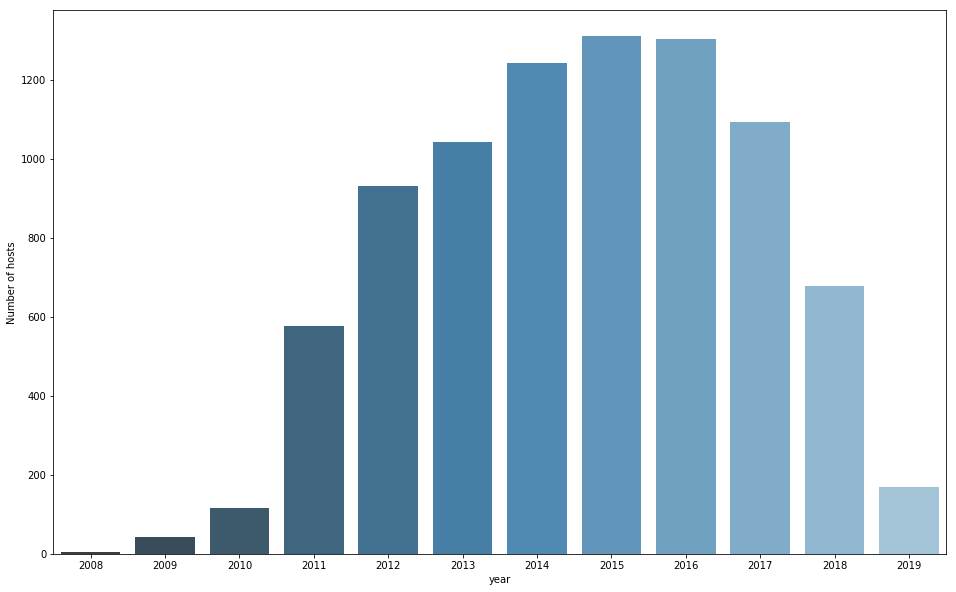

In [6]:
plt.figure(figsize=(16,10))
yearDF=inputDF.groupby(['year']).id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')

/Users/linhduong/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


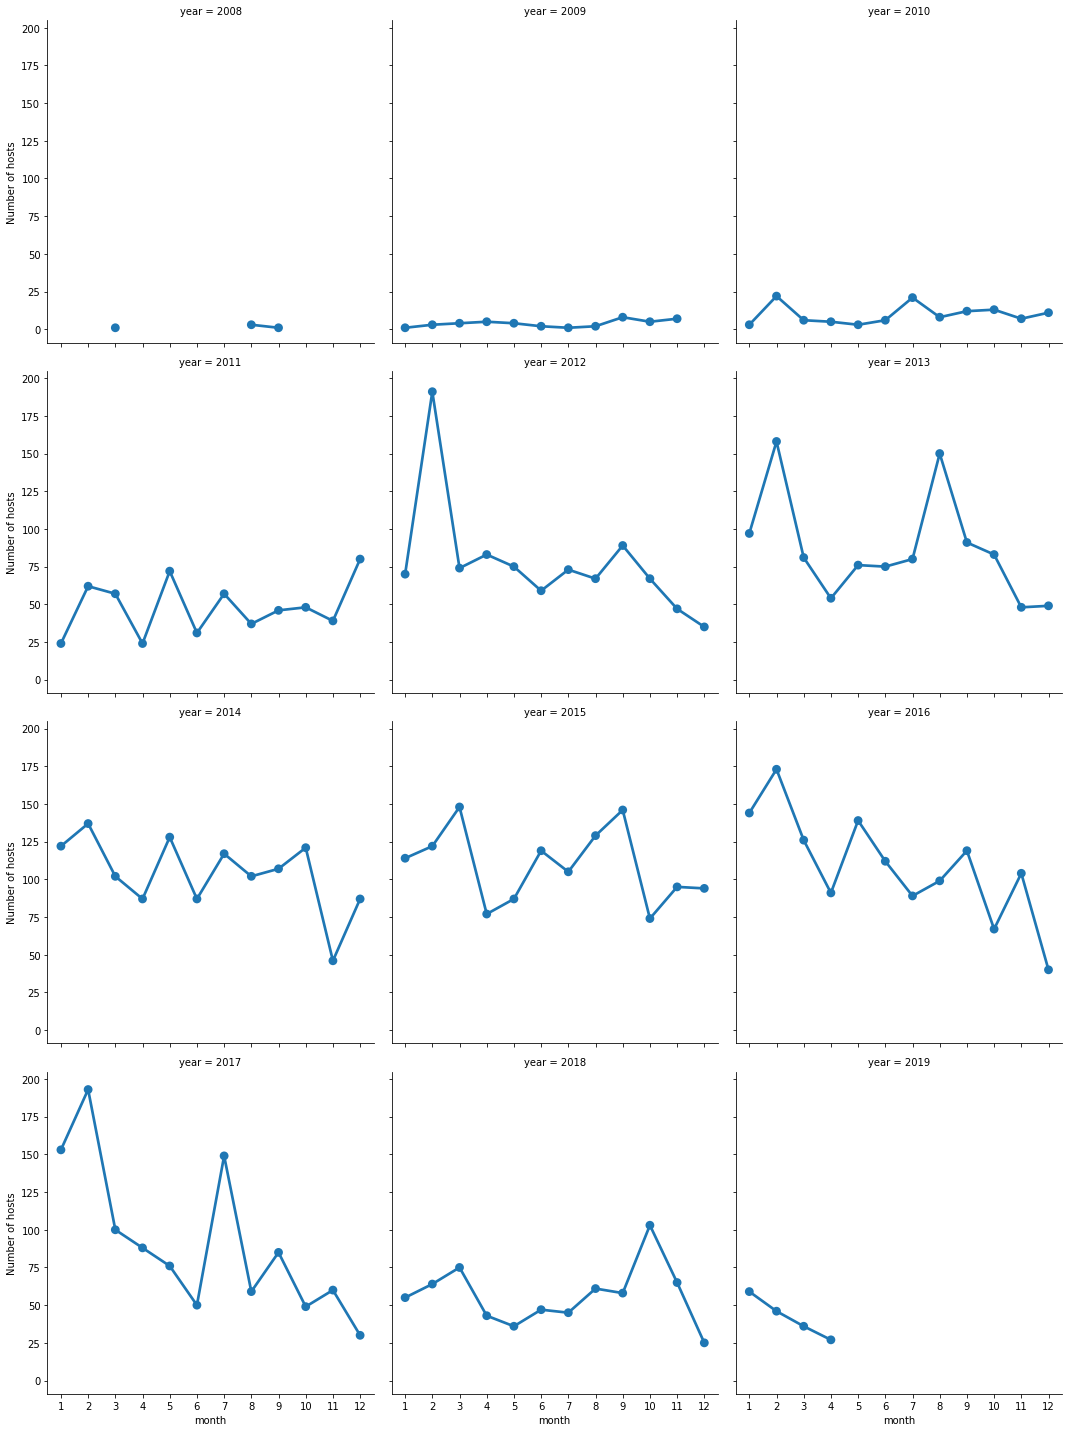

In [7]:
import seaborn as sns

yearMonth=inputDF.groupby(['year','month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['year','month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="month", y="Number of hosts",col="year",col_wrap=3)

Text(0,0.5,'Number of hosts')

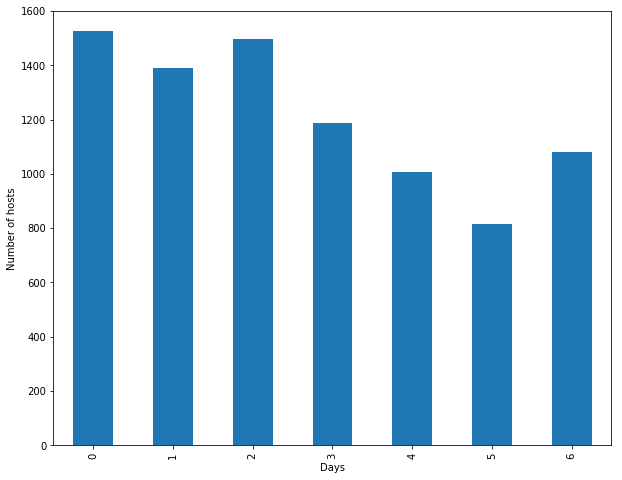

In [8]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")

In [9]:
#this will create 4 columns namely flexible, moderate, strict, super_strict_30 which are its categories

cancel_policy = pd.get_dummies(inputDF.cancellation_policy).astype(int)
cancel_policy.head()

,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [10]:
# Similiarly converting remaining categorial column,instant_booking  into indiactor variables

instant_booking = pd.get_dummies(inputDF.instant_bookable, prefix = 'instant_booking').astype(int)
instant_booking.head()

,instant_booking_f,instant_booking_t
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
room_type = pd.get_dummies(inputDF.room_type).astype(int)
room_type.head()

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [12]:
# drop original columns and replace them with indicator columns

inputDF = inputDF.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
inputDF = pd.concat((inputDF, cancel_policy, instant_booking, room_type), axis = 1)

inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,day,...,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
0,1078,2013-01-08,2,1.0,1.0,1.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",98.0,85.0,8,...,1,0,0,0,0,0,1,1,0,0
1,2265,2008-08-23,4,2.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",93.0,225.0,23,...,0,0,1,0,0,1,0,1,0,0
2,5245,2008-08-23,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",91.0,100.0,23,...,0,0,1,0,0,1,0,0,1,0
3,5456,2009-02-16,3,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",96.0,95.0,16,...,0,0,1,0,0,1,0,1,0,0
4,5769,2009-02-19,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",98.0,40.0,19,...,0,1,0,0,0,1,0,0,1,0


In [13]:
# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,day,...,flexible,moderate,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
0,1078,2013-01-08,2,1.0,1.0,1.0,15,98.0,85.0,8,...,1,0,0,0,0,0,1,1,0,0
1,2265,2008-08-23,4,2.0,2.0,2.0,35,93.0,225.0,23,...,0,0,1,0,0,1,0,1,0,0
2,5245,2008-08-23,2,1.0,1.0,1.0,25,91.0,100.0,23,...,0,0,1,0,0,1,0,0,1,0
3,5456,2009-02-16,3,1.0,1.0,2.0,31,96.0,95.0,16,...,0,0,1,0,0,1,0,1,0,0
4,5769,2009-02-19,2,1.0,1.0,1.0,21,98.0,40.0,19,...,0,1,0,0,0,1,0,0,1,0


In [14]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble

split_data= inputDF.drop(['price'],axis=1)
train1,test1,train2,test2=train_test_split(split_data,inputDF.price, test_size=0.4,train_size = 0.6,random_state=13)

In [15]:

# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(inputDF.price)

# standard deviation to compare 
std = np.std(inputDF.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))


mean: 297.0004702562897
standard deviation: 817.327235001824


In [49]:
train1['host_since'] = pd.to_numeric(train1.host_since)

/Users/linhduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
test1['host_since'] = pd.to_numeric(test1.host_since)

/Users/linhduong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print ("Linear Regression: " + str(linear_reg_error))


Linear Regression: 188.26839868586586
